In [201]:
import cv2 as cv
import os

In [202]:
base_dir = '/Users/spoorthysiddannaiah/Downloads/Disease'

In [203]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training alzheimers and nonalzheimers pictures
train_alzheimers_dir = os.path.join(train_dir, 'alzheimers')
train_nonalzheimers_dir = os.path.join(train_dir, 'nonalzheimers')

# Directory with test alzheimers and nonalzheimers pictures
validation_alzheimers_dir = os.path.join(validation_dir, 'alzheimers')
validation_nonalzheimers_dir = os.path.join(validation_dir, 'nonalzheimers')

In [204]:
train_alzheimers_fnames = os.listdir( train_alzheimers_dir )
train_nonalzheimers_fnames = os.listdir( train_nonalzheimers_dir)

print(train_alzheimers_fnames[:10])
print(train_nonalzheimers_fnames [:10])

['YAL0011.jpg', 'YAL1469.jpg', 'YAL0777.jpg', 'YAL2160.jpg', 'YAL2174.jpg', 'YAL0763.jpg', 'YAL0005.jpg', 'YAL1333.jpg', 'YAL0993.jpg', 'YAL1455.jpg']
['NAL2491.jpg', 'NAL1198.jpg', 'NAL0286.jpg', 'NAL1826.jpg', 'NAL1832.jpg', 'NAL0292.jpg', 'NAL2485.jpg', 'NAL0279.jpg', 'NAL1167.jpg', 'NAL1601.jpg']


In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [207]:
# import sys

# import tensorflow.keras
# import pandas as pd
# import sklearn as sk
# import tensorflow as tf

# print(f"Tensor Flow Version: {tf.__version__}")
# print(f"Keras Version: {tensorflow.keras.__version__}")
# print()
# print(f"Python {sys.version}")
# print(f"Pandas {pd.__version__}")
# print(f"Scikit-Learn {sk.__version__}")
# gpu = len(tf.config.list_physical_devices('GPU'))>0
# print("GPU is", "available" if gpu else "NOT AVAILABLE")

In [208]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#  output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

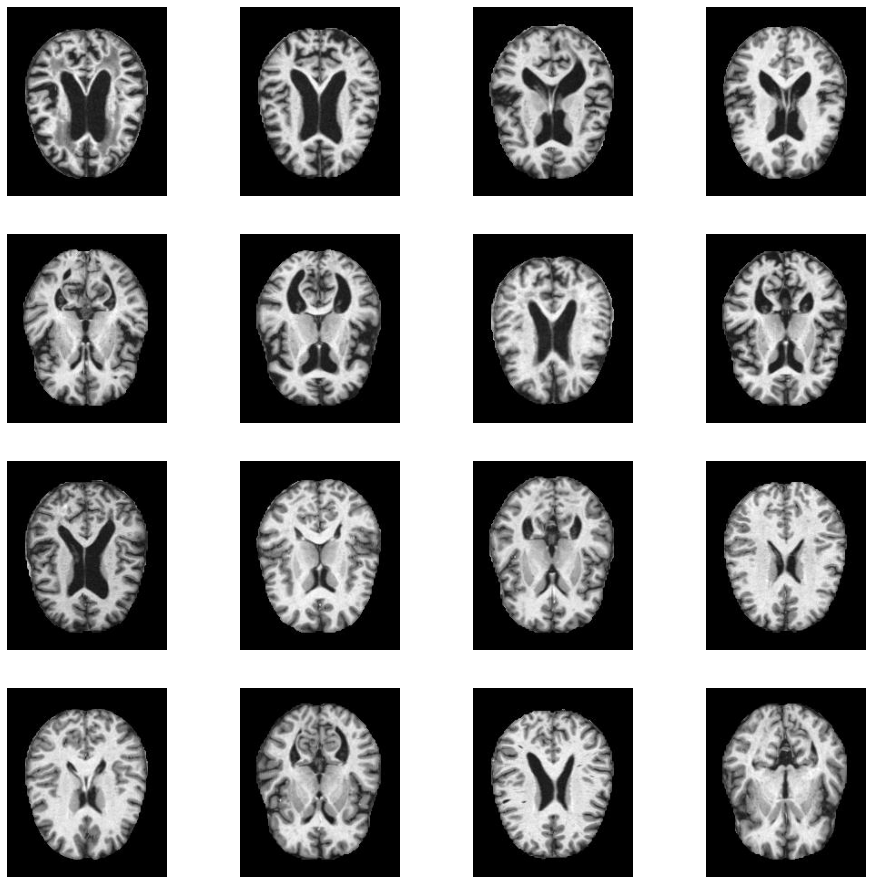

In [209]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_alzheimers_pix = [os.path.join(train_alzheimers_dir , fname) 
                for fname in train_alzheimers_fnames [ pic_index-8:pic_index] 
               ]

next_nonalzheimers_pix = [os.path.join(train_nonalzheimers_dir , fname) 
                for fname in train_nonalzheimers_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_alzheimers_pix+next_nonalzheimers_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img,cmap="gray")

plt.show()

In [299]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('alzheimers') and 1 for the other ('nonalzheimers')
    tf.keras.layers.Dense(1, activation='softmax')
])

In [300]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 26, 26, 64)     

In [304]:
from tensorflow.keras.optimizers import Adam

#TODO
#Stepped Learning rates

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [305]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    color_mode="grayscale",
                                                    target_size=(224, 224))   
# --------------------
# Flow test images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         color_mode="grayscale",
                                                         target_size = (224, 224))

Found 5120 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


In [306]:
history = model.fit(
            train_generator,
            steps_per_epoch= 256,
            epochs=20,
            validation_data=validation_generator,
            validation_steps= 16,
            verbose=1)

Epoch 1/20
256/256 [==============================] - 50s 192ms/step - loss: 0.6366 - accuracy: 0.5000 - val_loss: 0.5510 - val_accuracy: 0.4969
Epoch 2/20
256/256 [==============================] - 44s 172ms/step - loss: 0.5437 - accuracy: 0.5000 - val_loss: 0.4875 - val_accuracy: 0.4938
Epoch 3/20
256/256 [==============================] - 47s 184ms/step - loss: 0.4710 - accuracy: 0.5000 - val_loss: 0.3989 - val_accuracy: 0.4750
Epoch 4/20
256/256 [==============================] - 46s 178ms/step - loss: 0.4001 - accuracy: 0.5000 - val_loss: 0.3893 - val_accuracy: 0.4906
Epoch 5/20
256/256 [==============================] - 46s 178ms/step - loss: 0.3457 - accuracy: 0.5000 - val_loss: 0.3858 - val_accuracy: 0.5188
Epoch 6/20
256/256 [==============================] - 45s 176ms/step - loss: 0.2826 - accuracy: 0.5000 - val_loss: 0.3248 - val_accuracy: 0.4844
Epoch 7/20
256/256 [==============================] - 45s 174ms/step - loss: 0.2317 - accuracy: 0.5000 - val_loss: 0.2591 - val_ac

Text(0.5, 1.0, 'Training and validation loss')

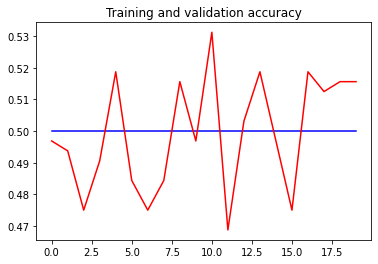

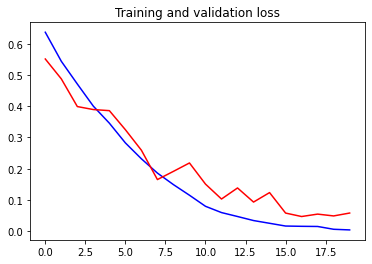

In [307]:
training_acc    = history.history['accuracy']
val_acc         = history.history[ 'val_accuracy' ]
training_loss   = history.history[ 'loss' ]
val_loss        = history.history['val_loss' ]

epochs   = range(len(training_acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs, training_acc, 'b')
plt.plot  ( epochs, val_acc, 'r' )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs, training_loss, 'b' )
plt.plot  ( epochs, val_loss, 'r' )
plt.title ('Training and validation loss'   )

In [228]:
# #prediction

# predict= model.predict(validation_generator, verbose=1)

64/64 [==============================] - 4s 51ms/step


In [230]:
# Prediction=predict.copy()
# Prediction[Prediction<=0.5] =0
# Prediction[Prediction>0.5] =1

In [242]:
# from sklearn.metrics import classification_report,confusion_matrix
# # cm = val_acc(data=confusion_matrix(validation_generator.classes, Prediction, labels=[0, 1]),index=["Actual nonalzheimers", "Actual alzheimers"],
# # columns=["Predicted nonalzheimers", "Predicted alzheimers"])
# # import seaborn as sns
# # sns.heatmap(cm,annot=True,fmt="d")

# cm=confusion_matrix((validation_generator.classes, Prediction,labels=[0,1]),index=["Actual nonalzheimers", "Actual alzheimers"], columns=["Predicted nonalzheimers", "Predicted alzheimers"])

# import seaborn as sns
# sns.heatmap(cm,annot=True,fmt="d")

### TO DO

1. Save the model
2. try to evaluate the training steps using tensorboard --> not so important
3. model metrics and evaluation metrics
    i) TP FP tables
    ii) confusion
    iii)
4. model optimization
    i) plaz around with bathc, epochs, learning rate, maybe even optimizer, steps
    ii) stepped learning

In [294]:
test_score = model.evaluate(train_generator, batch_size=20)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

256/256 [==============================] - 10s 38ms/step - loss: 0.0061 - accuracy: 1.0000
[INFO] accuracy: 100.00%
[INFO] Loss:  0.006090822629630566


In [278]:
#Plot the confusion matrix. Set Normalize = True/False
import matplotlib.cm as cm
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        
    

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [293]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

predict = model.predict(validation_generator)
prediction = np.argmax(predict, axis=1)
# cm_plot_labels=['nonalzheimers', 'alzheimers']
# plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')

# print('confusion matrix')

# cm = confusion_matrix(validation_generator.classes, prediction)
# plot_confusion_matrix(cm, target_names, title='confusion matrix')

print('Classification Report')
print(classification_report(validation_generator.classes, prediction, target_names=target_names))

64/64 [==============================] - 3s 38ms/step
Classification Report
               precision    recall  f1-score   support

   alzheimers       0.50      1.00      0.67       640
nonalzheimers       0.00      0.00      0.00       640

     accuracy                           0.50      1280
    macro avg       0.25      0.50      0.33      1280
 weighted avg       0.25      0.50      0.33      1280



/Users/spoorthysiddannaiah/Desktop/uni_ulm/classification/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/spoorthysiddannaiah/Desktop/uni_ulm/classification/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/spoorthysiddannaiah/Desktop/uni_ulm/classification/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param